# Array Based Sequences

This notebook describes Array Based Sequences, Stacks, Queues and DeQueues. It covers the following:

1. d

For each concept, there are Python examples which help illustrate the ideas.

Python has 3 built-in sequence classes:
* List
* Tuple
* String

Each of these Classes:
* Support Indexing
* Use an *array* to represent the sequence

Here is the ABT for a Sequence

In [2]:
from abc import ABCMeta, abstractmethod

class Sequence(metaclass=ABCMeta):  
    """
    Version of collections.Sequence Abstract Base Class
    From Data Structures and Algorithms in Python (Goodrich et al.)
    
    Note: This is a metaclass (not a superclass).
    Meaning this provides a template for the class definition itself.
    constructor for this class raises an error.
    """

    @abstractmethod
    def __len__(self):
        """return the length of the sequence."""

    @abstractmethod    
    def __getitem__(self, j):
        """return the element at index j of the sequence"""

    def __contains__(self, val):
        """returns True if val found in the sequence; False otherwise"""
        for j in range(len(self)):
            if self[j] == val: #  found a match
                return True
        return False

    def index(self, val):
        """returns leftmost index at which val is found (or raise ValueError)"""
        for j in range(len(self)):
            if self[j] == val: #  leftmost match
                return j
        raise ValueError('value not in sequence') #  never found a match

    def count(self, val):
        """return the number of elements equal to given value"""
        k = 0
        for j in range(len(self)):
            if self[j] == val:  # found a match
                k += 1
        return k

Items in list can point to same memory address

In [1]:
x = [1,2,3]
y = [x, x]
x.remove(1)
print(y)

[[2, 3], [2, 3]]


Different lists can have items that point to same memory address

In [2]:
x = [1,2,3]
y = [x, [4,5,6]]
z = [x, [7,8,9]]
x.remove(1)
print(y)
print(z)

[[2, 3], [4, 5, 6]]
[[2, 3], [7, 8, 9]]


Combining the above 2 concepts.
* Notice that the slice of `y` from index 0 to 1 (i.e. `y[0:2]`) point to the same objects as `y` does at indices 0 and 1.
* So mutating items in `y[0:2]` mutates them in `y` too.
* And since both items in the slice point to the same object, the `.pop()` is actually being called twice!

In [3]:
x = [1,2,3]
y = [x, x, x]
for item in y[0:2]:
    item.pop()
print(y)

[[1], [1], [1]]


Since int is an immutable data type, overriding the element in the second index of `temp` breaks its alias with the element in the sixth index of `primes`

In [4]:
primes = [2, 3, 5, 7, 11, 13, 17, 19]
temp = primes[3:6]
temp[2] = 15
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19]


Notice how this code would behave unexpectedly if we had a mutable data type in our list.
For an extreme example, consider the two lists

In [5]:
x = [0]*8
y = [[0]]*8

x[0] = 1
y[0].pop()

print('list x is now: {}'.format(x))
print('list y is now: {}'.format(y))

list x is now: [1, 0, 0, 0, 0, 0, 0, 0]
list y is now: [[], [], [], [], [], [], [], []]


Notice how the list (referential array) increases in size as elements are added

Note: Because a list is a referential structure, the result of `getsizeof` only includes the size for representing its primary structure (the references). It does not account for memory used by the objects that the references refer to

In [21]:
test_list = []
prev_size = 0
for _ in range(18):
    curr_size = sys.getsizeof(test_list)
    change = curr_size - prev_size
    test_list.append(None)
    print('{} element list has {} Bytes. {} Bytes added {} -> {}'.format(len(test_list)-1, curr_size, change, len(test_list)-2, len(test_list)-1))
    prev_size = curr_size

0 element list has 72 Bytes. 72 Bytes added -1 -> 0
1 element list has 104 Bytes. 32 Bytes added 0 -> 1
2 element list has 104 Bytes. 0 Bytes added 1 -> 2
3 element list has 104 Bytes. 0 Bytes added 2 -> 3
4 element list has 104 Bytes. 0 Bytes added 3 -> 4
5 element list has 136 Bytes. 32 Bytes added 4 -> 5
6 element list has 136 Bytes. 0 Bytes added 5 -> 6
7 element list has 136 Bytes. 0 Bytes added 6 -> 7
8 element list has 136 Bytes. 0 Bytes added 7 -> 8
9 element list has 200 Bytes. 64 Bytes added 8 -> 9
10 element list has 200 Bytes. 0 Bytes added 9 -> 10
11 element list has 200 Bytes. 0 Bytes added 10 -> 11
12 element list has 200 Bytes. 0 Bytes added 11 -> 12
13 element list has 200 Bytes. 0 Bytes added 12 -> 13
14 element list has 200 Bytes. 0 Bytes added 13 -> 14
15 element list has 200 Bytes. 0 Bytes added 14 -> 15
16 element list has 200 Bytes. 0 Bytes added 15 -> 16
17 element list has 272 Bytes. 72 Bytes added 16 -> 17


* So going from zero elements to one leads to an increase of 32 Bytes $\Rightarrow$ 32/8 = 4 Memory Addresses.
* Indeed, the array doesn't change size until the 5th element!

In [67]:
import time
import pandas as pd

recorded_data = recorded_data = pd.DataFrame(columns=['seconds', 'change', 'has_changed', 'array_size'])
test_list = []
prev_size = 0
for _ in range(18):
    curr_size = sys.getsizeof(test_list)
    change = curr_size - prev_size
    start = time.time()
    test_list.append(None)
    end = time.time()
    prev_size = curr_size
    recorded_data = recorded_data.append({'array_size': len(test_list), 
                                          'seconds': round(end-start, 10), 
                                          'change': change, 
                                          'has_changed': change > 0}, ignore_index=True)

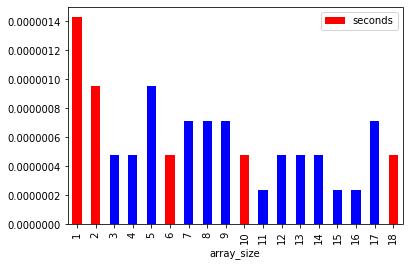

In [95]:
import matplotlib.pyplot as plt

colors = ['red' if x else 'blue' for x in recorded_data.has_changed.tolist()]
recorded_data.plot(x='array_size', y='seconds', kind='bar', color=colors)

In [93]:
recorded_data